# Heart Disease Prediction using Machine Learning algorithms

In [89]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Impoting algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Reading the Dataset

In [92]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [33]:
df.size

4242

In [34]:
df.shape

(303, 14)

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for null values in the dataset

In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Feature Selection

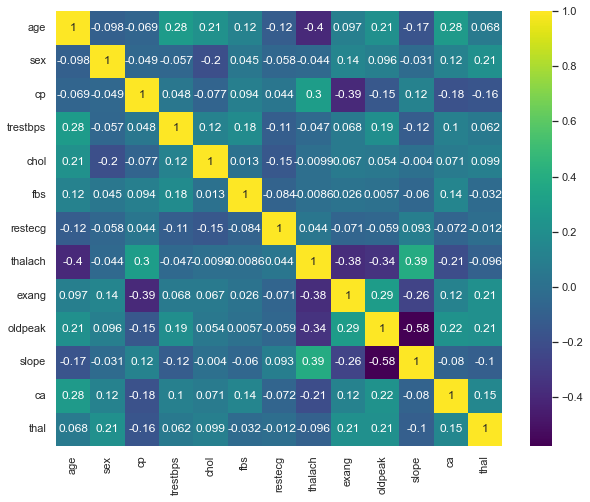

In [85]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

Data Visuvalization

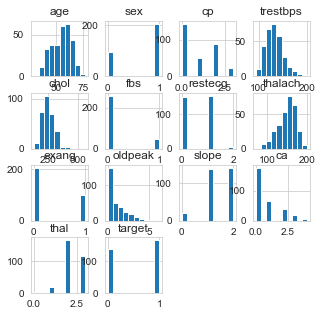

In [38]:
df.hist(figsize=(5,5))
plt.show()

Spliting the dataset into training and testing

In [42]:
x,y=df,df.target

In [43]:
x.drop('target',axis=1,inplace=True)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
x.shape

(303, 13)

In [46]:
y.shape

(303,)

In [47]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [49]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [50]:
Y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [51]:
print ("Train_set_x shape: " + str(X_train.shape))
print ("Train_set_y shape: " + str(Y_train.shape))
print ("Test_set_x shape: " + str(X_test.shape))
print ("Test_set_y shape: " + str(Y_test.shape))

Train_set_x shape: (212, 13)
Train_set_y shape: (212,)
Test_set_x shape: (91, 13)
Test_set_y shape: (91,)


Logistic Regression

In [52]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [53]:
pred1=LR.predict(X_test)
acc_LR=accuracy_score(Y_test,pred1)*100
print('Accuracy score using LR:',acc_LR)

Accuracy score using LR: 76.92307692307693


In [54]:
pred1

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [57]:
# accuracy on training data
X_train_prediction = LR.predict(X_train)
training_data_accuracy_LR = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy_LR)

0.8537735849056604


In [58]:
# accuracy on testing data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.7692307692307693


Predictive System for LR

In [59]:
input=(78,1,3,45,33,7,5,78,8,1,65,7,8)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_LR=LR.predict(input_reshape)
print(pred_LR)
if (pred_LR[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


Naive Bayes

In [60]:
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [61]:
pred2=NB.predict(X_test)
acc_NB=accuracy_score(Y_test,pred2)*100
print('Accuracy score using LR:',acc_NB)

Accuracy score using LR: 79.12087912087912


In [62]:
pred2

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

Predictive System for NB

In [63]:
input=(63,1,3,145,233,4,5,778,8,1.5,8,7,8)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_NB=NB.predict(input_reshape)
print(pred_NB)
if (pred_NB[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Decision Tree Classifier

In [64]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
pred3=dt.predict(X_test)
acc_dt=accuracy_score(Y_test,pred3)*100
print('Accuracy score using DT:',acc_dt,'%')

Accuracy score using DT: 73.62637362637363 %


In [66]:
pred3

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0], dtype=int64)

Predictive System for DT

In [67]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_dt=dt.predict(input_reshape)
print(pred_dt)
if (pred_dt[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


K-Nearest Neighbor

In [68]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(Y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(Y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.8571428571428571


In [69]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [70]:
pred4 = knn.predict(X_test)
acc_knn = accuracy_score(Y_test,pred4)*100
print('Accuracy_score using KNN : ',acc_knn,'%')

Accuracy_score using KNN :  85.71428571428571 %


In [71]:
pred4

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0], dtype=int64)

Predictive System for KNN

In [72]:
input=(56,0,1,140,294,0,0,153,0,1.3,1,0,2)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_knn=knn.predict(input_reshape)
print(pred_knn)
if (pred_knn[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


Random forest classifier

In [73]:
RFC = RandomForestClassifier(max_depth=5)
RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [74]:
pred5 = RFC.predict(X_test)
acc_RFC = accuracy_score(Y_test,pred5)*100
print('Accuracy_score using RFC : ',acc_RFC,'%')

Accuracy_score using RFC :  75.82417582417582 %


In [75]:
pred5

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

Predictive System for RFC

In [76]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_RFC=RFC.predict(input_reshape)
print(pred_RFC)
if (pred_RFC[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [77]:
algorithm=['RFC','LR','KNN','DT','NB']
scores=[acc_RFC,acc_LR,acc_knn,acc_dt,acc_NB]

C:\Users\darig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

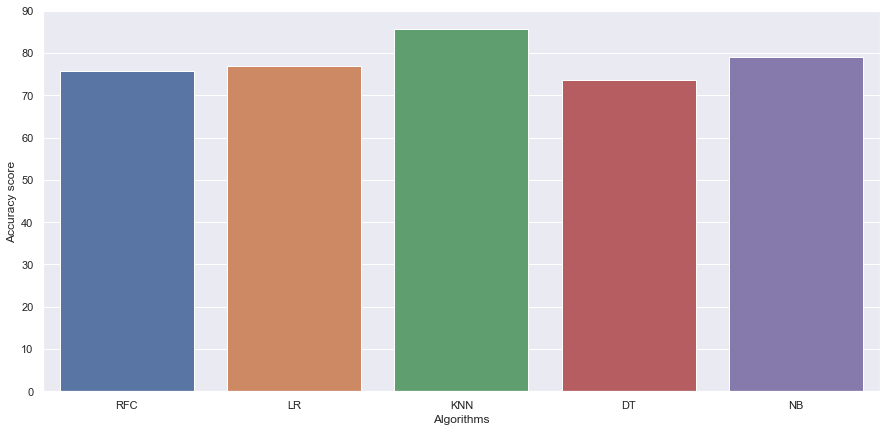

In [78]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithm,scores)